In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. 데이터 생성

- 남,여 키와 몸무게 데이터를 군집화

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
random.randint(140,195) # 140부터 195까지 키 랜덤으로 뽑을예정

151

In [21]:
data = []
for i in range(50):
    # 여자 데이터 data 추가
    data.append([random.randint(40, 70), random.randint(140,170)]) # 0방에 몸무게, 1방은 키
    # 남자 데이터 data 추가
    data.append([random.randint(60, 95), random.randint(160,195)]) # 0방에 몸무게, 1방은 키
#data

In [26]:
# for문(없어보임)
# for female in data[::2]:
#     print(female, end=' ') 
    
# 리스트컴프리핸션
# 여자 데이터
# print('여자 :', [female for female in data[::2]])

# 남자 데이터
# print('남자 :', [male for male in data[1::2]])

print('여자 몸무게(x축):', [female[0] for female in data[::2]])
print('여자 키(y축):', [female[1] for female in data[::2]])
print()
print('남자 몸무게(x축):', [male[0] for male in data[1::2]])
print('남자 키(y축):', [male[1] for male in data[1::2]])

여자 몸무게(x축): [66, 65, 50, 46, 64, 62, 48, 56, 63, 58, 63, 45, 52, 56, 70, 63, 55, 65, 47, 54, 55, 44, 45, 67, 70, 40, 63, 61, 43, 49, 51, 42, 53, 41, 43, 63, 60, 61, 65, 49, 43, 67, 53, 67, 60, 52, 69, 58, 54, 41]
여자 키(y축): [141, 160, 162, 147, 161, 155, 144, 166, 140, 145, 168, 153, 146, 163, 161, 161, 169, 153, 145, 148, 142, 147, 146, 141, 147, 156, 154, 155, 143, 152, 151, 158, 149, 160, 158, 148, 154, 156, 166, 146, 160, 140, 154, 158, 152, 146, 149, 146, 160, 146]

남자 몸무게(x축): [82, 61, 73, 68, 73, 65, 61, 63, 91, 78, 71, 87, 69, 77, 65, 85, 74, 94, 73, 60, 64, 86, 76, 66, 92, 88, 77, 68, 64, 87, 74, 71, 84, 67, 79, 81, 71, 79, 72, 72, 78, 84, 91, 85, 62, 74, 65, 90, 86, 60]
남자 키(y축): [165, 187, 186, 195, 177, 172, 162, 186, 172, 174, 175, 194, 183, 167, 189, 166, 180, 178, 172, 176, 182, 193, 173, 189, 179, 192, 185, 180, 194, 166, 164, 190, 165, 193, 164, 161, 193, 179, 178, 165, 191, 193, 171, 164, 171, 186, 184, 177, 189, 177]


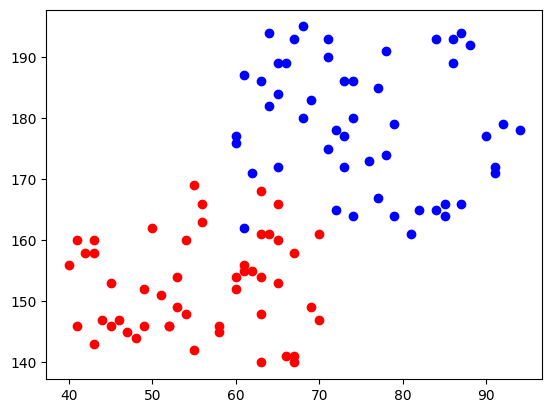

In [38]:
plt.plot([female[0] for female in data[::2]], [female[1] for female in data[::2]], 'o', color='r') # o는 마커
plt.plot([male[0] for male in data[1::2]], [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [96]:
# 초기 랜덤 지점 2개

random_points = [[random.randint(40,95), random.randint(140,195)], # 몸무게 전체범위, 키 전체범위
                [random.randint(40,95), random.randint(140,195)]]
random_points

[[40, 191], [63, 148]]

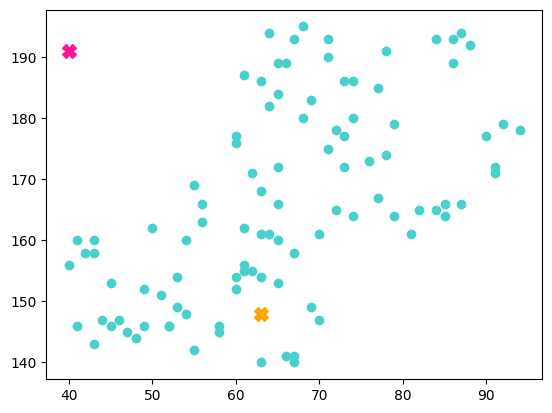

In [97]:
plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='mediumturquoise') 
plt.plot(random_points[0][0], random_points[0][1], 'X', markersize=10, color='deeppink') # 기준점 1 (random_points[0])
plt.plot(random_points[1][0], random_points[1][1], 'X', markersize=10, color='orange') # 기준점 2 (random_points[1])
plt.show()

In [98]:
# 두 점 거리를 return / a:[n,n], b:[n,n]

def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) # 제곱할거라서 음수인거 상관없음

dist([0,0],[3,4])

print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0])) # 여기가 더 가까움

56.356011214421486
7.615773105863909


In [99]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류

group1 = []
group2 = []

for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d)
    else:
        group2.append(d)
len(group1), len(group2)

(24, 76)

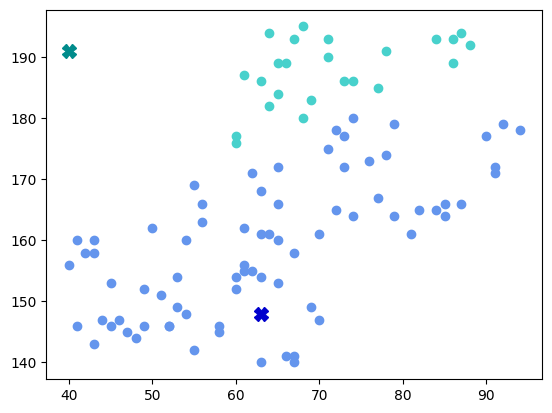

In [100]:
# group1 과 group2, 기준점 1, 기준점 2

plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='mediumturquoise') 
plt.plot([d[0] for d in group2], [d[1] for d in group2], 'o', color='cornflowerblue') 

plt.plot(random_points[0][0], random_points[0][1], 'X', markersize=10, color='darkcyan') # 기준점 1 (random_points[0])
plt.plot(random_points[1][0], random_points[1][1], 'X', markersize=10, color='mediumblue') # 기준점 2 (random_points[1])
plt.show()

In [101]:
# 기준점 이동 : group1의 중심점(기준점1), group2의 중심점(기준점2)

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[0] = [group1_meanX, group1_meanY]

group2_meanX = np.mean([d[0] for d in group2])
group2_meanY = np.mean([d[1] for d in group2])
random_points[1] = [group2_meanX, group2_meanY]

In [102]:
group1 = []
group2 = []

for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d)
    else:
        group2.append(d)
len(group1), len(group2)

(37, 63)

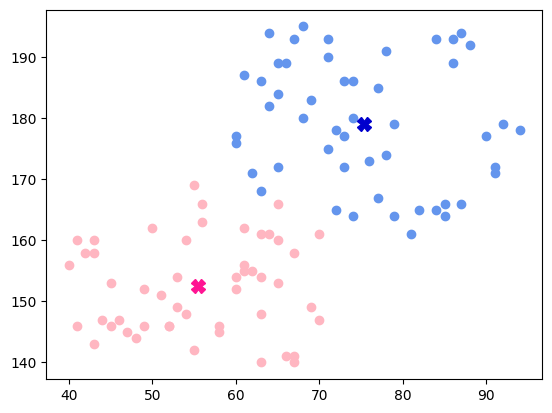

In [121]:
# group1 과 group2, 기준점 1, 기준점 2 (3번 반복함)

plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='lightpink') 
plt.plot([d[0] for d in group2], [d[1] for d in group2], 'o', color='cornflowerblue') 

plt.plot(random_points[0][0], random_points[0][1], 'X', markersize=10, color='deeppink') # 기준점 1 (random_points[0])
plt.plot(random_points[1][0], random_points[1][1], 'X', markersize=10, color='mediumblue') # 기준점 2 (random_points[1])
plt.show()

# 3. 군집화 전체 코드(for문 이용)

- 랜덤포인트 2개 지정
- 랜덤포인트 2개 출력과 시각화
- for문
    - 랜덤포인트 2지점 기준으로 group1과 gruop2 나눔
    - gruop1의 중간점과 gruop2의 중간점을 랜덤포인트로 업데이트
    - 랜덤포인트 출력과 시각화
    

초기 기준점 : [[86, 152], [79, 175]]
1 번째 랜덤포인트 : [[57.94285714285714, 148.88571428571427], [69.41538461538461, 174.7846153846154]]
2 번째 랜덤포인트 : [[54.97826086956522, 151.30434782608697], [74.27777777777777, 178.0]]
3 번째 랜덤포인트 : [[55.0, 151.97916666666666], [75.0, 178.40384615384616]]
4 번째 랜덤포인트 : [[55.30612244897959, 152.16326530612244], [75.09803921568627, 178.7450980392157]]
5 번째 랜덤포인트 : [[55.30612244897959, 152.16326530612244], [75.09803921568627, 178.7450980392157]]
6 번째 랜덤포인트 : [[55.30612244897959, 152.16326530612244], [75.09803921568627, 178.7450980392157]]
7 번째 랜덤포인트 : [[55.30612244897959, 152.16326530612244], [75.09803921568627, 178.7450980392157]]
8 번째 랜덤포인트 : [[55.30612244897959, 152.16326530612244], [75.09803921568627, 178.7450980392157]]
9 번째 랜덤포인트 : [[55.30612244897959, 152.16326530612244], [75.09803921568627, 178.7450980392157]]


(140.0, 195.0)

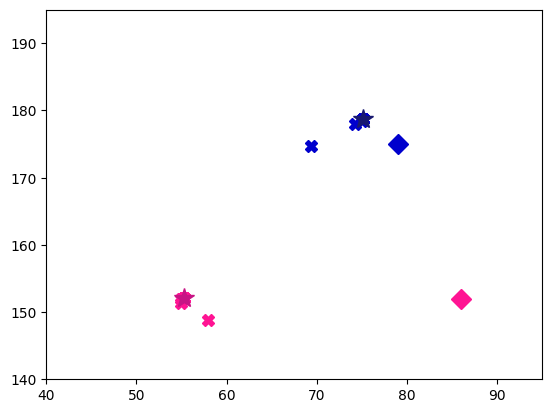

In [124]:
# 초기 랜덤포인트
random_points = [[random.randint(40,95), random.randint(140,195)],
                 [random.randint(40,95), random.randint(140,195)]] 


# 초기 랜덤포인트 출력과 시각화
print('초기 기준점 :', random_points)
plt.plot(random_points[0][0], random_points[0][1], 'D', markersize=10, color='deeppink') # 기준점 1 (random_points[0])
plt.plot(random_points[1][0], random_points[1][1], 'D', markersize=10, color='mediumblue') # 기준점 2 (random_points[1])


# for문
for i in range(1,10):
    # 랜덤포인트 2지점 기준으로 group1과 gruop2 나눔
    group1 = []
    group2 = []
    
    for d in data:
        if dist(d, random_points[0]) < dist(d, random_points[1]):
            group1.append(d)
        else:
            group2.append(d)
    
    # group1의 중간점, group2의 중간점으로 랜덤포인트 업데이트
    group1_meanX = np.mean([d[0] for d in group1])
    group1_meanY = np.mean([d[1] for d in group1])    
    random_points[0] = [group1_meanX, group1_meanY]
    
    group2_meanX = np.mean([d[0] for d in group2])
    group2_meanY = np.mean([d[1] for d in group2])
    random_points[1] = [group2_meanX, group2_meanY]
    
    # 포인트 출력
    print(i, '번째 랜덤포인트 :', random_points)
    plt.plot(random_points[0][0], random_points[0][1], 'X', markersize=8, color='deeppink') # 기준점 1 (random_points[0])
    plt.plot(random_points[1][0], random_points[1][1], 'X', markersize=8, color='mediumblue') # 기준점 2 (random_points[1])


# 최종 포인트 확인
plt.plot(random_points[0][0], random_points[0][1], '*', markersize=15, color='mediumvioletred') # 기준점 1 (random_points[0])
plt.plot(random_points[1][0], random_points[1][1], '*', markersize=15, color='midnightblue') # 기준점 2 (random_points[1])    

# 기준점 치우쳐짐 방지
plt.xlim([40,95])
plt.ylim([140,195])

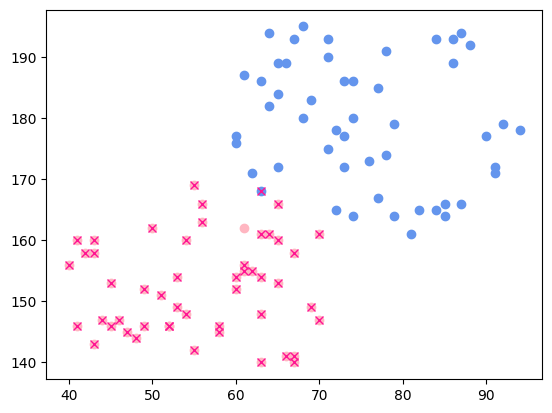

In [120]:
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='lightpink')
plt.plot([d[0] for d in group2], [d[1] for d in group2], 'o', color='cornflowerblue')
plt.plot([d[0] for d in data[::2]], [d[1] for d in data[::2]], 'x', color='deeppink')
plt.show()

# 4. 군집화 api(sklearn)이용

- sklearn : 머신러닝 패키지
    - 예측모델 : 분류분석, 회귀분석, 군집분석 - fit(학습), predict(예측-군집은 없음)
    - 변환모델 : 전처리시 사용 (ex.인코딩, 스케일 조정 - fit(학습), transform(변환함수), fit_transform(학습→변환))

In [ ]:
# 군집분석 라이브러리가 경고 메세지를(joplib 충돌) 출력할 경우 

# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [129]:
from sklearn.cluster import KMeans

data = np.array(data)

model = KMeans(n_clusters=2,  # 2개 그룹으로 군집
              init='random',  # 초기 기준점을 랜덤하게. 디폴트는 있는 점 중 하나
              n_init=10,      # 10번 돌리겠다
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed값

model.fit(data) # 입력데이터. 군집데이터는 출력데이터 필요없음.

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [130]:
# 기준점(중심점)

model.cluster_centers_

array([[ 75.09803922, 178.74509804],
       [ 55.30612245, 152.16326531]])

In [128]:
# 나눠진 그룹들의 인덱스

model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [131]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

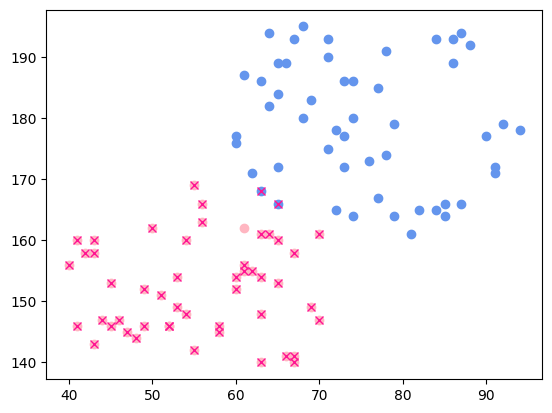

In [132]:
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='lightpink')
plt.plot([d[0] for d in group2], [d[1] for d in group2], 'o', color='cornflowerblue')
plt.plot([d[0] for d in data[::2]], [d[1] for d in data[::2]], 'x', color='deeppink')
plt.show()